In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


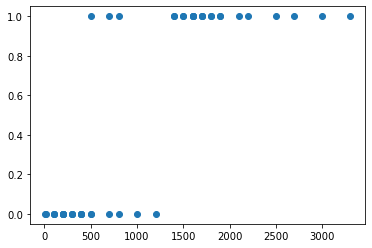

In [2]:
base = pd.read_csv('Eleicao.csv', sep = ';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [3]:
# Correlation
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [4]:
X = base.iloc[:, 2].values
X = X[:, np.newaxis]
y = base.iloc[:, 1].values

In [8]:
# Model Creation
logisticModel = LogisticRegression()
logisticModel.fit(X, y)
logisticModel.coef_
logisticModel.intercept_

array([-4.60287217])

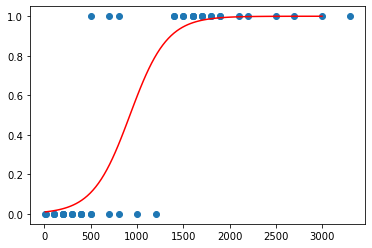

In [9]:
#Model Prediction
plt.scatter(X, y)
X_test = np.linspace(10, 3000, 100)
def model(x):
    return 1 / (1 + np.exp(-x))
r = model(X_test * logisticModel.coef_ + logisticModel.intercept_).ravel()
plt.plot(X_test, r, color = 'red')

In [14]:
# New Candidates Prediction
data = pd.read_csv('NovosCandidatos.csv', sep = ';')
expenditure = data.iloc[:, 1].values
expenditure = expenditure.reshape(-1, 1)
predict = logisticModel.predict(expenditure)
data = np.column_stack((predict, predict))